In [32]:
import pandas as pd;
import numpy as np;
import scipy as sp;
import sklearn;
import sys;
from nltk.corpus import stopwords;
import nltk;
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
#from gensim.models import ldamodel
#import gensim.corpora;
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer;
from sklearn.decomposition import NMF;
from sklearn.preprocessing import normalize;
import pickle;

from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline


import pandas as pd
import csv
import os
import numpy
import copy
%matplotlib inline
import numpy as np
import seaborn as sns
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
#from gensim import corpora, models, similarities, matutils
#from gensim.corpora.dictionary import Dictionary
from sklearn.cluster import DBSCAN
from sklearn.decomposition import NMF, PCA
import matplotlib as mpl
import matplotlib.pyplot as plt
from collections import Counter, defaultdict, OrderedDict
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/Users/natha/Documents/tweets1/tweets.csv",  header=0)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

import langid # identify languages based on tweets

ModuleNotFoundError: No module named 'langid'

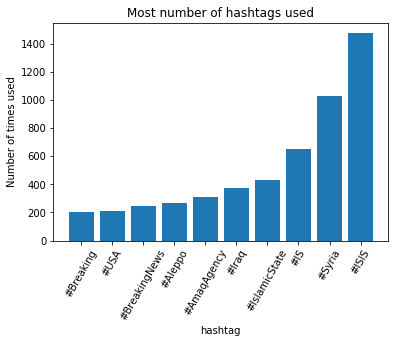

In [8]:
MyColumns = ['hashtag','cnt']
hashtagcount = pd.DataFrame(columns=MyColumns)

for index, row in dataset.iterrows():
    if '#' in row['tweets']:
        words = row['tweets'].split()
        for word in words:
            if word[0] == '#':
                hashtagcount.loc[len(hashtagcount)] = [word, 1]  # adding a row
                
hashtags = hashtagcount.groupby(['hashtag']).count().reset_index()
hashtags = hashtags.sort_values(by='cnt').tail(10)

x = hashtags['hashtag']
y = hashtags['cnt']
plt.xlabel('hashtag')
plt.ylabel('Number of times used')
plt.title('Most number of hashtags used')
plt.xticks(range(10), x, rotation=60)
plt.bar(range(10), y, label='Most hashtags used')
plt.show()

In [23]:
regex_str = [
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
 
def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token.lower() for token in tokens]
    return tokens

In [25]:
vect1 = CountVectorizer(analyzer="word", stop_words="english", min_df=200, decode_error="ignore", ngram_range=(1, 1), dtype=np.int32)

# applying Vectorizer to preprocessed tweets
sub11 = vect1.fit_transform(df["tweets"].map(lambda x: " ".join(preprocess(x, lowercase = True))).tolist())

# creating (word, count) list
sub12 = zip(vect1.get_feature_names(), np.asarray(sub11.sum(axis = 0)).ravel())

# getting Top20 words
sorted(sub12, key = lambda x: x[1], reverse = True)[0:25]

[('rt', 5874),
 ('isis', 2306),
 ('amp', 1355),
 ('killed', 1287),
 ('syria', 1272),
 ('army', 902),
 ('state', 692),
 ('islamic', 686),
 ('assad', 591),
 ('aleppo', 586),
 ('ramiallolah', 577),
 ('near', 575),
 ('allah', 569),
 ('iraq', 562),
 ('breaking', 555),
 ('iraqi', 549),
 ('syrian', 543),
 ('soldiers', 528),
 ('today', 511),
 ('attack', 500),
 ('forces', 484),
 ('al', 477),
 ('city', 459),
 ('islamicstate', 456),
 ('people', 418)]

In [27]:
tags = df["tweets"].map(lambda x: [tag for tag in preprocess(x, lowercase=True) if tag.startswith('@')])
tags = sum(tags, [])
tags[0:5]

['@khalidmaghrebi',
 '@seifulmaslul123',
 '@cheerleadunite',
 '@khalidmaghrebi',
 '@seifulmaslul123']

In [28]:
# Top20
Counter(tags).most_common(20)


[('@ramiallolah', 577),
 ('@nidalgazaui', 341),
 ('@warreporter1', 256),
 ('@7layers', 116),
 ('@scotsmaninfidel', 79),
 ('@sparksofirhabi3', 76),
 ('@didyouknowvs', 72),
 ('@maghrebiqm', 72),
 ('@conflicts', 71),
 ('@unclesamcoco', 69),
 ('@spicylatte123', 61),
 ('@ele7vn', 58),
 ('@1texanna', 56),
 ('@wayf44rer', 54),
 ('@sassysassyred', 54),
 ('@shamirebel', 52),
 ('@pachaconsumer', 48),
 ('@sparksofirhabi5', 48),
 ('@kafirkaty', 48),
 ('@vivarevolt', 46)]

In [30]:
hashs = df["tweets"].map(lambda x: [hashs for hashs in preprocess(x, lowercase=True) if hashs.startswith('#')])
hashs = sum(hashs, [])
hashs[0:5]

['#jn', '#jn', '#', '#jn', '#is']

In [31]:
# Top20
Counter(hashs).most_common(20)

[('#isis', 1497),
 ('#syria', 979),
 ('#', 681),
 ('#is', 643),
 ('#islamicstate', 448),
 ('#iraq', 398),
 ('#aleppo', 378),
 ('#amaqagency', 322),
 ('#breaking', 320),
 ('#iraqi', 259),
 ('#breakingnews', 247),
 ('#turkey', 222),
 ('#syri', 216),
 ('#usa', 207),
 ('#palmyra', 204),
 ('#ypg', 193),
 ('#syrian', 191),
 ('#russian', 183),
 ('#assad', 157),
 ('#mosul', 152)]

SyntaxError: unexpected EOF while parsing (<ipython-input-33-481fb971f7a0>, line 20)